In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
import ast

%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [2]:
!git clone https://github.com/amueller/word_cloud.git

fatal: destination path 'word_cloud' already exists and is not an empty directory.


In [3]:
!pip install word_cloud/.

Processing c:\users\liana\spring2021\cs6474\project\cs6474_twitter_data_collection\word_cloud
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.1.post3+g0b3b942
    Uninstalling wordcloud-1.8.1.post3+g0b3b942:
      Successfully uninstalled wordcloud-1.8.1.post3+g0b3b942
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'done'


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
You should consider upgrading via the 'c:\python27\python.exe -m pip install --upgrade pip' command.


# Data Loading

In [4]:
df = pd.read_csv('./character_tweets_english.csv')
df.dataframeName = 'character_tweets_english.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 8162 rows and 7 columns


In [5]:
df.head()

,Unnamed: 0,tweet_id,author_id,date,text,lang,name_searched
0,0,461259797468573697,2432293886,2014-04-29T21:44:40.000Z,"Beyond the army blanket, the Finn waited at the white table.",en,Finn
1,1,461252098953576448,14482363,2014-04-29T21:14:04.000Z,"♫ Just Announced: Austin, TX - Jul 18 at Black Finn Ameripub http://t.co/tKh6yLyXqA",en,Finn
2,2,461233685052653568,127956375,2014-04-29T20:00:54.000Z,Finn's Reversible Bandana With Plastic Bag Pocket For Your Dog Hot Tropical Color http://t.co/b...,en,Finn
3,5,461146329264046081,604765876,2014-04-29T14:13:47.000Z,"Finn 2, a long haired black cheese boy, and Brie 2, who looks just like her momma. Turning 8 we...",en,Finn
4,6,461141522730459138,12373992,2014-04-29T13:54:41.000Z,"@Finn_Mackay @fusillisara being a woman may not be, being a white straight man, but there is sti...",en,Finn


In [6]:
df.describe()

,Unnamed: 0,tweet_id,author_id
count,8162.000000,8.162000e+03,8.162000e+03
mean,56.739280,7.383015e+17,1.140469e+17
std,40.819916,3.026322e+17,3.034757e+17
min,0.000000,7.890326e+08,2.349300e+04
25%,20.000000,4.612806e+17,1.443793e+08
50%,50.000000,7.239559e+17,5.206626e+08
75%,90.000000,1.045066e+18,2.615399e+09
max,148.000000,1.150193e+18,1.149599e+18


# Exploratory Analysis

In [7]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

In [8]:
# Groupby by subreddits
characters = df.groupby("name_searched")

# Summary statistic of all subreddits
characters.describe()

Unnamed: 0                                                 \
                     count       mean        std  min    25%   50%    75%   
name_searched                                                               
 Anthony Mackie       22.0   6.727273   5.119355  0.0   2.25   6.0  10.75   
 Nicole Beharie        7.0   1.428571   1.618347  0.0   0.00   1.0   2.50   
007                  304.0  57.111842  34.684918  0.0  27.75  55.0  82.00   
Abbie Mills            1.0   0.000000        NaN  0.0   0.00   0.0   0.00   
Adam Driver          243.0  58.534979  37.809792  0.0  27.50  56.0  87.00   
...                    ...        ...        ...  ...    ...   ...    ...   
Tom Mison              2.0   0.500000   0.707107  0.0   0.25   0.5   0.75   
Valkyrie              88.0  48.670455  39.250660  0.0  11.75  45.5  81.25   
Vesper Lynd            6.0   2.000000   2.097618  0.0   0.25   1.5   3.50   
Will Smith           281.0  62.220641  39.857708  0.0  28.00  60.0  94.00   
Zendaya              169.0  59.603550  42.986878  0.0  18.00  55.0  97.00   

                       tweet_id                ...                \
                   max    count          mean  ...           75%   
name_searched                                  ...                 
 Anthony Mackie   16.0     22.0  4.441930e+17  ...  4.442168e+17   
 Nicole Beharie    4.0      7.0  3.796083e+17  ...  3.796984e+17   
007              137.0    304.0  1.150151e+18  ...  1.150185e+18   
Abbie Mills        0.0      1.0  3.797390e+17  ...  3.797390e+17   
Adam Driver      141.0    243.0  4.612469e+17  ...  4.612869e+17   
...                ...      ...           ...  ...           ...   
Tom Mison          1.0      2.0  3.796951e+17  ...  3.797022e+17   
Valkyrie         141.0     88.0  7.159066e+17  ...  7.159393e+17   
Vesper Lynd        5.0      6.0  2.668797e+17  ...  2.669961e+17   
Will Smith       138.0    281.0  5.394185e+17  ...  5.395041e+17   
Zendaya          139.0    169.0  7.601697e+17  ...  7.602294e+17   

                              author_id                              \
                          max     count          mean           std   
name_searched                                                         
 Anthony Mackie  4.442534e+17      22.0  5.104222e+08  5.826161e+08   
 Nicole Beharie  3.797367e+17       7.0  6.063318e+08  5.241205e+08   
007              1.150193e+18     304.0  3.569506e+17  4.671912e+17   
Abbie Mills      3.797390e+17       1.0  8.869345e+08           NaN   
Adam Driver      4.612937e+17     243.0  3.594649e+08  5.783374e+08   
...                       ...       ...           ...           ...   
Tom Mison        3.797093e+17       2.0  2.173758e+08  9.412248e+07   
Valkyrie         7.160239e+17      88.0  1.232021e+09  1.292105e+09   
Vesper Lynd      2.670402e+17       6.0  2.652209e+07  1.671655e+07   
Will Smith       5.395690e+17     281.0  8.376207e+08  8.560184e+08   
Zendaya          7.602633e+17     169.0  3.421497e+16  1.539952e+17   

                                                                        \
                         min           25%           50%           75%   
name_searched                                                            
 Anthony Mackie   12753682.0  5.244240e+07  3.527729e+08  6.779757e+08   
 Nicole Beharie   18688832.0  2.165889e+08  4.241216e+08  9.919388e+08   
007               12969632.0  2.761929e+08  2.502513e+09  8.676075e+17   
Abbie Mills      886934508.0  8.869345e+08  8.869345e+08  8.869345e+08   
Adam Driver         483223.0  2.683712e+07  1.018854e+08  3.723375e+08   
...                      ...           ...           ...           ...   
Tom Mison        150821131.0  1.840985e+08  2.173758e+08  2.506531e+08   
Valkyrie          14518515.0  1.072274e+08  6.759973e+08  2.483051e+09   
Vesper Lynd        5042921.0  1.374792e+07  2.834320e+07  4.157943e+07   
Will Smith         8976352.0  1.781448e+08  4.887422e+08  1.354511e+09   
Zendaya           25482342.

In [9]:
df['name_searched'].value_counts()

M                     520
Hamilton              441
Joker                 350
John Boyega           346
Jurnee Smollett       331
                     ... 
Tom Mison               2
Arthur                  1
Nick Fury               1
Abbie Mills             1
Scarlett Johannson      1
Name: name_searched, Length: 65, dtype: int64

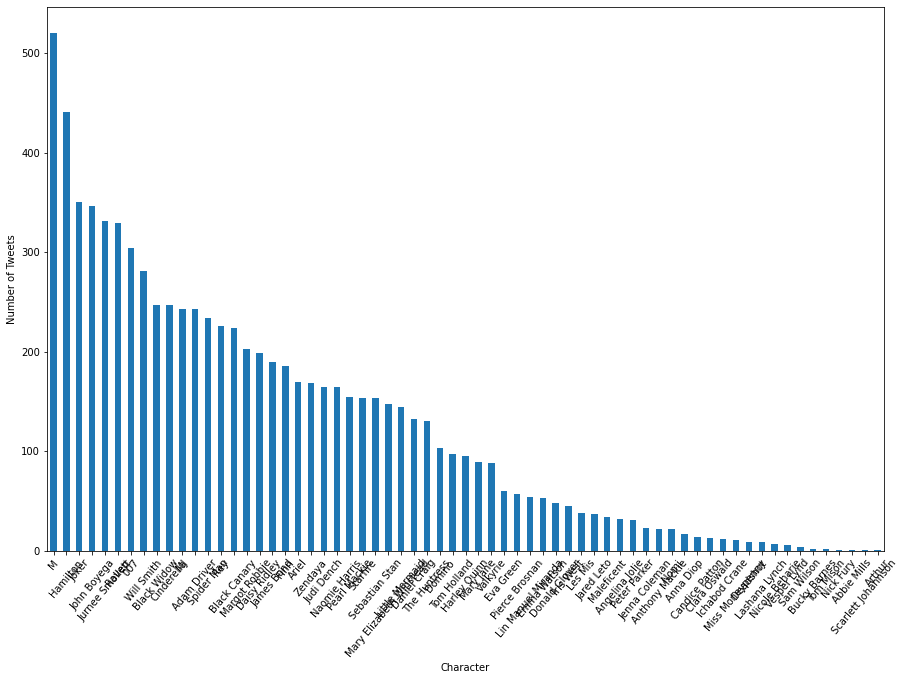

In [10]:
plt.figure(figsize=(15,10))
characters.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Character")
plt.ylabel("Number of Tweets")
plt.show()

Beyond the army blanket, the Finn waited at the white table.


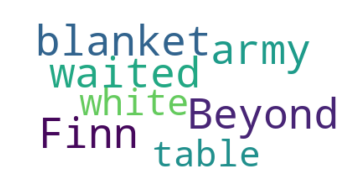

In [11]:
# Start with one review:
text = df.text[0]
print(text)
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()